In [28]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [29]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [30]:
# Import NumPy
import numpy as np

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [33]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

skjaerhollen no
mar del plata ar
katima mulilo na
cabo san lucas mx
busselton au
rikitea pf
alofi nu
marsa matruh eg
berlevag no
port elizabeth za
lebu cl
kysyl-syr ru
atuona pf
kearney us
punta arenas cl
kamsack ca
rikitea pf
upernavik gl
albany au
vaini to
beremend hu
fairview ca
yumen cn
najran sa
berlevag no
cherskiy ru
puerto ayora ec
khatanga ru
hobart au
busselton au
ushuaia ar
bredasdorp za
hithadhoo mv
vao nc
changli cn
rikitea pf
gbarnga lr
hilo us
rikitea pf
kapaa us
saint-philippe re
clyde river ca
rikitea pf
yatou cn
saint-philippe re
avarua ck
mataura pf
ushuaia ar
waitati nz
pilar ph
kaduna ng
thompson ca
hilo us
aginskoye ru
port alfred za
esperance au
maryville us
maumere id
rikitea pf
gidole et
choix mx
victoria sc
luderitz na
tuktoyaktuk ca
barrow us
bilibino ru
dolinsk ru
mataura pf
chagda ru
lodwar ke
carnarvon au
artyk ru
kidal ml
bredasdorp za
vaini to
cabo san lucas mx
san patricio mx
hobyo so
jamestown sh
sitka us
the valley ai
kapaa us
bluff nz
nabire id
udach

cape town za
dingle ie
tadine nc
yellowknife ca
barrow us
tiksi ru
shangqiu cn
hofn is
airai pw
ushuaia ar
taolanaro mg
codrington ag
talnakh ru
mujiayingzi cn
ushuaia ar
belushya guba ru
vila praia de ancora pt
cape town za
jining cn
iquitos pe
khatanga ru
taolanaro mg
qaanaaq gl
cape town za
flinders au
bluff nz
atuona pf
vaini to
mahebourg mu
ushuaia ar
taolanaro mg
carnarvon au
rikitea pf
codrington ag
jamestown sh
lompoc us
chokurdakh ru
nanortalik gl
codrington ag
mataura pf
axim gh
svetlaya ru
jamestown sh
cape town za
sakakah sa
punta arenas cl
clovis us
taolanaro mg
cape town za
mataura pf
san cristobal ec
cristalina br
torbay ca
goderich sl
poquoson us
mataura pf
bangolo ci
vostok ru
chuy uy
ngukurr au
punta arenas cl
rikitea pf
veraval in
guilin cn
punta arenas cl
ngukurr au
salym ru
puerto ayora ec
champerico gt
atuona pf
albany au
kavieng pg
upernavik gl
evensk ru
busselton au
rikitea pf
lander us
fortuna us
rikitea pf
avarua ck
east london za
dieppe fr
dutlwe bw
tuktoyakt

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [35]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cce4c99147be89708c6471290d24220


In [42]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4cce4c99147be89708c6471290d24220&q=Boston


In [43]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [56]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 51 of Set 45 | skjaerhollen
City not found. Skipping...
Processing Record 52 of Set 45 | mar del plata
Processing Record 53 of Set 45 | katima mulilo
Processing Record 54 of Set 45 | cabo san lucas
Processing Record 55 of Set 45 | busselton
Processing Record 56 of Set 45 | rikitea
Processing Record 57 of Set 45 | alofi
Processing Record 58 of Set 45 | marsa matruh
Processing Record 59 of Set 45 | berlevag
Processing Record 60 of Set 45 | port elizabeth
Processing Record 61 of Set 45 | lebu
Processing Record 62 of Set 45 | kysyl-syr
Processing Record 63 of Set 45 | atuona
Processing Record 64 of Set 45 | kearney
Processing Record 65 of Set 45 | punta arenas
Processing Record 66 of Set 45 | kamsack
Processing Record 67 of Set 45 | upernavik
Processing Record 68 of Set 45 | albany
Processing Record 69 of Set 45 | vaini
Processing Record 70 of Set 45 | beremend
Processing Record 71 of Set 45 | fairview
Processing Record 72 of Set 45 | yumen
Processing Record 73 of Set 45 

Processing Record 34 of Set 48 | kromy
Processing Record 35 of Set 48 | rio gallegos
Processing Record 36 of Set 48 | lasa
Processing Record 37 of Set 48 | provideniya
Processing Record 38 of Set 48 | lata
Processing Record 39 of Set 48 | sansai
City not found. Skipping...
Processing Record 40 of Set 48 | airai
Processing Record 41 of Set 48 | faanui
Processing Record 42 of Set 48 | mwanza
Processing Record 43 of Set 48 | bambous virieux
Processing Record 44 of Set 48 | auki
Processing Record 45 of Set 48 | beloha
Processing Record 46 of Set 48 | vila velha
Processing Record 47 of Set 48 | brigantine
Processing Record 48 of Set 48 | mitchell
Processing Record 49 of Set 48 | ambon
Processing Record 50 of Set 48 | paracuru
Processing Record 1 of Set 49 | lumberton
Processing Record 2 of Set 49 | westport
Processing Record 3 of Set 49 | matara
Processing Record 4 of Set 49 | pingdingshan
Processing Record 5 of Set 49 | vestmannaeyjar
Processing Record 6 of Set 49 | bereda
Processing Recor

Processing Record 21 of Set 52 | eregli
Processing Record 22 of Set 52 | rosarito
Processing Record 23 of Set 52 | waddan
Processing Record 24 of Set 52 | ust-nera
Processing Record 25 of Set 52 | iralaya
Processing Record 26 of Set 52 | toliary
City not found. Skipping...
Processing Record 27 of Set 52 | miri
Processing Record 28 of Set 52 | yekaterinoslavka
Processing Record 29 of Set 52 | nemuro
Processing Record 30 of Set 52 | san ramon
Processing Record 31 of Set 52 | sao joao da barra
Processing Record 32 of Set 52 | qaanaaq
Processing Record 33 of Set 52 | uvalde
Processing Record 34 of Set 52 | seymchan
Processing Record 35 of Set 52 | chuy
Processing Record 36 of Set 52 | skagastrond
City not found. Skipping...
Processing Record 37 of Set 52 | punta alta
Processing Record 38 of Set 52 | san cristobal
Processing Record 39 of Set 52 | maicao
Processing Record 40 of Set 52 | port keats
Processing Record 41 of Set 52 | stornoway
Processing Record 42 of Set 52 | preobrazheniye
Proc

Processing Record 8 of Set 56 | ailigandi
Processing Record 9 of Set 56 | tautira
Processing Record 10 of Set 56 | te anau
Processing Record 11 of Set 56 | bundi
Processing Record 12 of Set 56 | los alamos
Processing Record 13 of Set 56 | skjervoy
Processing Record 14 of Set 56 | angoche
Processing Record 15 of Set 56 | borama
City not found. Skipping...
Processing Record 16 of Set 56 | cascais
Processing Record 17 of Set 56 | kiama
Processing Record 18 of Set 56 | shubarkuduk
Processing Record 19 of Set 56 | tilichiki
Processing Record 20 of Set 56 | ugoofaaru
Processing Record 21 of Set 56 | chernogorsk
Processing Record 22 of Set 56 | laela
Processing Record 23 of Set 56 | medea
Processing Record 24 of Set 56 | kletskaya
Processing Record 25 of Set 56 | bargal
City not found. Skipping...
Processing Record 26 of Set 56 | egvekinot
Processing Record 27 of Set 56 | uwayl
City not found. Skipping...
Processing Record 28 of Set 56 | dera din panah
City not found. Skipping...
Processing R

In [59]:
import pandas as pd

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hay River,60.8156,-115.7999,39.18,60,47,11.50,CA,2021-10-03 15:44:01
1,Hay River,60.8156,-115.7999,39.18,60,47,11.50,CA,2021-10-03 15:44:01
2,Mar Del Plata,-38.0023,-57.5575,55.42,54,40,20.00,AR,2021-10-03 15:46:38
3,Katima Mulilo,-17.5000,24.2667,88.86,20,83,4.50,NA,2021-10-03 15:46:38
4,Cabo San Lucas,22.8909,-109.9124,85.51,71,98,0.60,MX,2021-10-03 15:46:39
5,Busselton,-33.6500,115.3333,47.08,61,98,2.17,AU,2021-10-03 15:46:39
6,Rikitea,-23.1203,-134.9692,73.08,64,6,17.31,PF,2021-10-03 15:46:39
7,Alofi,-19.0595,-169.9187,73.29,94,97,11.50,NU,2021-10-03 15:46:40
8,Marsa Matruh,31.3525,27.2453,77.20,50,20,11.50,EG,2021-10-03 15:46:40
9,Berlevag,70.8578,29.0864,51.80,77,90,33.42,NO,2021-10-03 15:46:40


In [60]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df = city_data_df[new_column_order]

In [61]:
city_data_new_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hay River,CA,2021-10-03 15:44:01,60.8156,-115.7999,39.18,60,47,11.50
1,Hay River,CA,2021-10-03 15:44:01,60.8156,-115.7999,39.18,60,47,11.50
2,Mar Del Plata,AR,2021-10-03 15:46:38,-38.0023,-57.5575,55.42,54,40,20.00
3,Katima Mulilo,NA,2021-10-03 15:46:38,-17.5000,24.2667,88.86,20,83,4.50
4,Cabo San Lucas,MX,2021-10-03 15:46:39,22.8909,-109.9124,85.51,71,98,0.60
...,...,...,...,...,...,...,...,...,...
549,Chesterville,US,2021-10-03 15:49:27,44.5512,-70.0862,55.98,94,100,1.70
550,Darnah,LY,2021-10-03 15:49:27,32.7670,22.6367,71.02,64,5,18.81
551,Akonolinga,CM,2021-10-03 15:49:28,3.7667,12.2500,74.61,92,100,1.21
552,Fochville,ZA,2021-10-03 15:49:28,-26.4886,27.4939,74.12,11,0,9.64


In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [66]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/03/21'

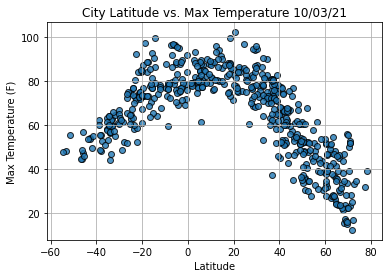

In [70]:
# Import matplotlib
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

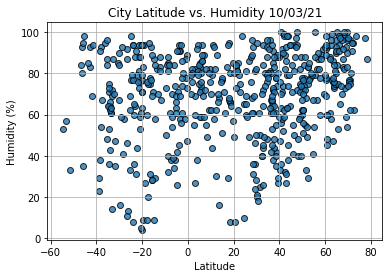

In [71]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

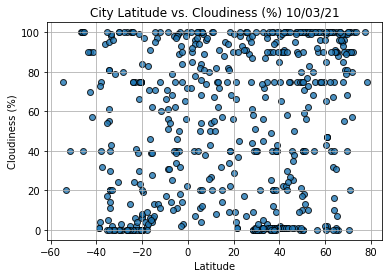

In [72]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

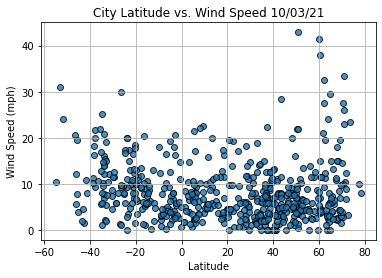

In [73]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()